In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore',
    'CoastalVulnerability', '_sort_4', '_sort_1', 'AgriculturalPractices', '_25th', '_sort_0'
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240518_190323"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240518_190323/ds_sub_fit/sub_fit_ho.
2024-05-18 19:03:24,231	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[18]	valid_set's l2: 0.000771079	valid_set's r2: -80.782
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.000756192	valid_set's r2: -80.7317
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.0013305	valid_set's r2: -80.969
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best it

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[12]	valid_set's l2: 0.00101341	valid_set's r2: -80.6525
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[11]	valid_set's l2: 0.00107526	valid_set's r2: -81.5829
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[11]	valid_set's l2: 0.00107958	valid_set's r2: -81.0527
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[11]	valid_set's l2: 0.00108189	valid_set's r2: -80.7847
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[11]	valid_set's l2: 0.00107831	valid_set's r2: -81.2557
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[11]	valid_set's l2: 0.00107929	valid_set's r2: -81.1828
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[11]	valid_set's l2: 0.00106916	valid_set's r2: -82.0156
	Ran out of time, early

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 25.
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 38.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7981	 = Validation score   (r2)
	75.23s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.3s of the 8705.97s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.3s of the 8605.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Sequentia

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239312	valid_set's r2: -90.5932
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00231074	valid_set's r2: -88.4642
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239332	valid_set's r2: -91.1784
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258204	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238852	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230327	valid_set's r2: -89.3897
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238879	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 18.
	Ran out of time, early stopping on iteration 22.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2462	 = Validation score   (r2)
	58.47s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 67.63s of the 4335.39s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autog

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 67.63s of the 4227.63s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247533	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 67.63s of the 4214.11s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 93. Best iteration is:
	[93]	valid_set's l2: 0.000355756	valid_set's r2: -81.2776
	Ran out of time, early stopping on iteration 94. Best iteration is:
	[90]	valid_set's l2: 0.000358144	valid_set's r2: -81.0183
	Ran out of time, early stopping on iteration 99. Best iteration is:
	[98]	valid_set's l2: 0.00035827	valid_set's r2: -81.7874
	Ran out of time, early stopping on iteration 99. Best iteration is:
	[99]	valid_set's l2: 0.000354253	valid_set's r2: -81.6289
	Ran out of time, early stopping on iteration 105. Best iteration is:
	[104]	valid_set's l2: 0.000356618	valid_set's r2: -80.9637
	Ran out of time, early stopping on iteration 150. Best iteration is:
	[142]	valid_set's l2: 0.000354364	valid_set's r2: -81.009
	Ran out of time, early stopping on iteration 184. Best iteration is:
	[182]	valid_set's l2: 0.000351857	valid_set's r2: -81.1799
	Stopping HP

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 25. Best iteration is:
	[8]	valid_set's l2: 0.00104835	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 25. Best iteration is:
	[8]	valid_set's l2: 0.00105319	valid_set's r2: -81.0178
	Ran out of time, early stopping on iteration 26. Best iteration is:
	[8]	valid_set's l2: 0.00104806	valid_set's r2: -81.7855
	Ran out of time, early stopping on iteration 26. Best iteration is:
	[8]	valid_set's l2: 0.00104587	valid_set's r2: -81.6237
	Ran out of time, early stopping on iteration 28. Best iteration is:
	[8]	valid_set's l2: 0.00105428	valid_set's r2: -80.9603
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	130.34s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BA

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 90.
	Ran out of time, early stopping on iteration 93.
	Ran out of time, early stopping on iteration 96.
	Ran out of time, early stopping on iteration 99.
	Ran out of time, early stopping on iteration 106.
	Ran out of time, early stopping on iteration 116.
	Ran out of time, early stopping on iteration 126.
	Ran out of time, early stopping on iteration 152.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8662	 = Validation score   (r2)
	250.46s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 266.7s of the 27640.31s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8675	 = Validation score   (r2)
	2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8561	 = Validation score   (r2)
	252.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 266.7s of the 27097.53s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6157	 = Validation score   (r2)
	187.64s	 = Training   runtime
	1.51s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 266.7s of the 26906.88s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 179.
	Ran out of time, early stopping on iteration 188.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 26. Best iteration is:
	[22]	valid_set's l2: 0.000593789	valid_set's r2: -81.057
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.000757125	valid_set's r2: -81.0634
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.00102722	valid_set's r2: -81.2173
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00240016	valid_set's r2: -90.8479
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[14]	valid_set's l2: 0.000882431	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[9]	valid_set's l2: 0.000956457	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[6]	valid_set's l2: 0.00156926	valid_set's r2: -81.3205
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00247377	valid_set's r2: -93.9047
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best i

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 22.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 34.
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 38.
	Ran out of time, early stopping on iteration 46.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.825	 = Validation score   (r2)
	203.7s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 215.71s of the 14042.08s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-package

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 215.71s of the 13788.93s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16. Best iter

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

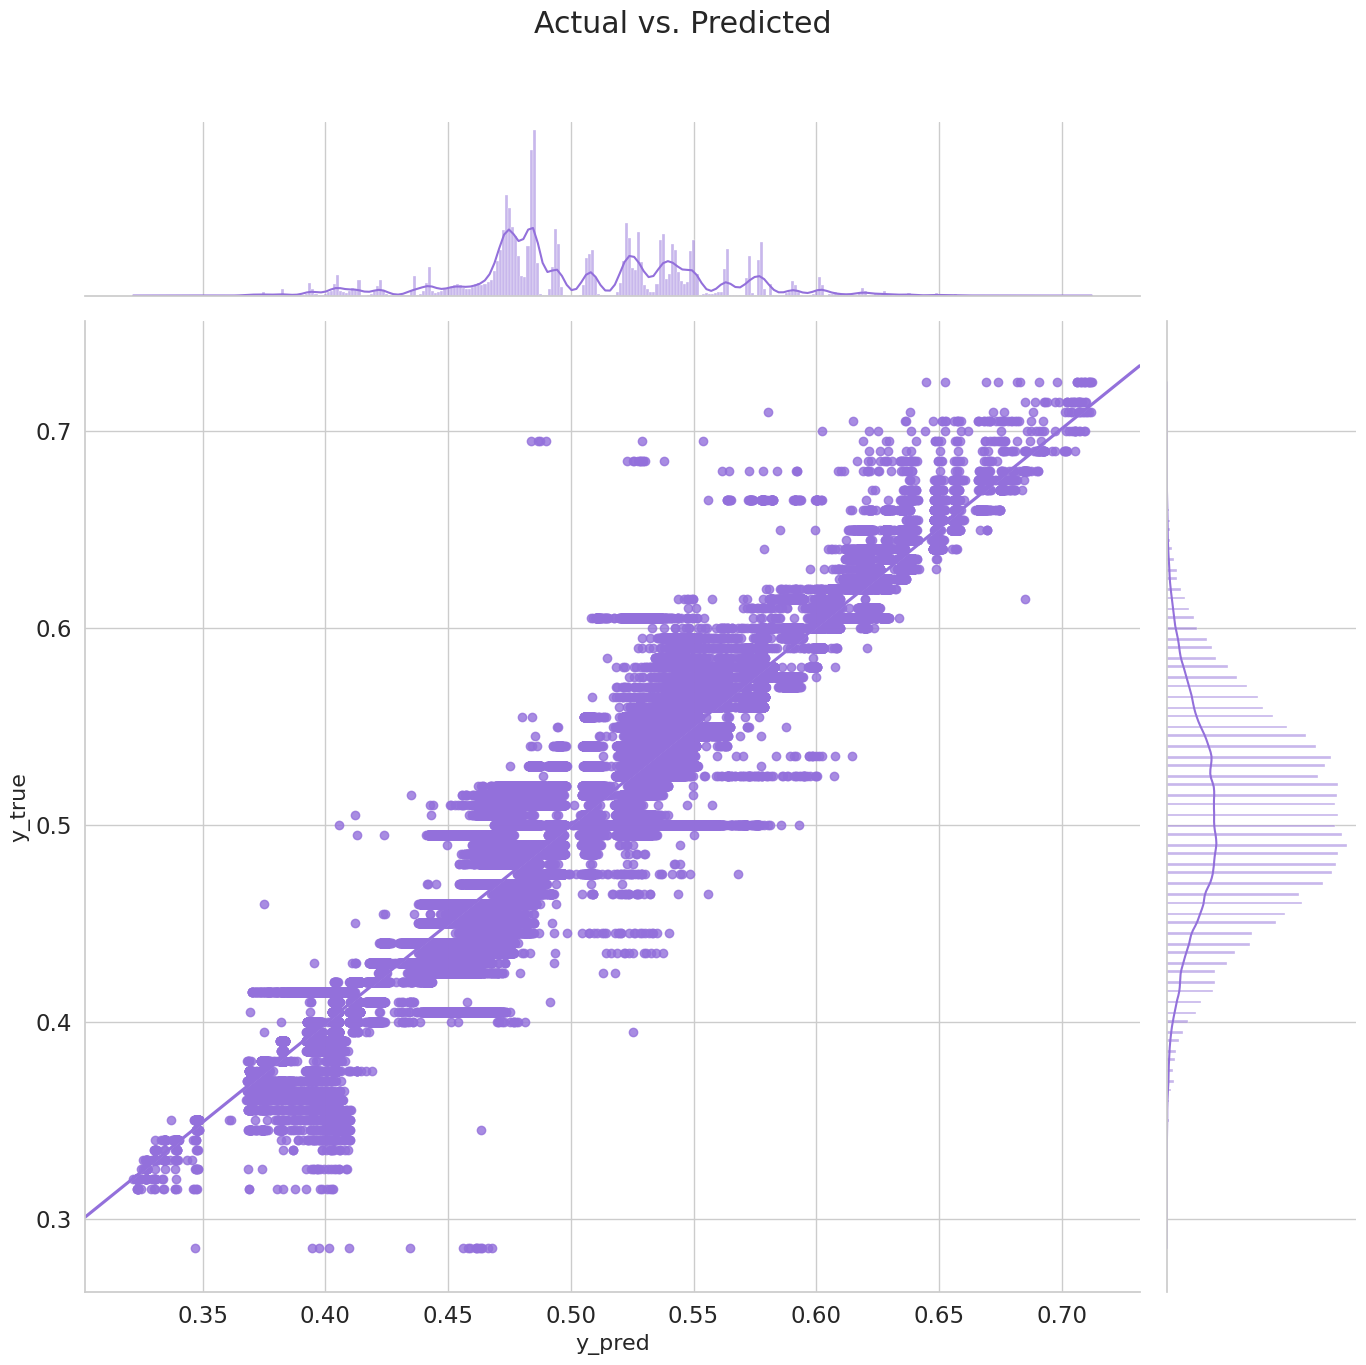

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8694308043845006


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_19', '_50th', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869431,0.869268,r2,100.728600,1.763047,12643.787693,0.007555,0.025064,7.473325,3,True,55
1,XGBoost_r194_BAG_L1,0.869303,0.869134,r2,0.985106,0.004977,214.701668,0.985106,0.004977,214.701668,1,True,19
2,CatBoost_r6_BAG_L2,0.869163,0.868906,r2,99.858232,1.733422,12428.700607,0.844633,0.004281,206.462030,2,True,54
3,ExtraTrees_r4_BAG_L1,0.868758,0.868107,r2,0.985152,0.003258,288.005029,0.985152,0.003258,288.005029,1,True,33
4,XGBoost_r194_BAG_L2,0.868658,0.868165,r2,99.876413,1.733702,12429.852338,0.862814,0.004561,207.613761,2,True,53
5,CatBoost_r180_BAG_L1,0.868616,0.868583,r2,1.094506,0.004504,252.223721,1.094506,0.004504,252.223721,1,True,45
6,ExtraTrees_r172_BAG_L1,0.868549,0.867857,r2,0.759963,0.003262,281.631573,0.759963,0.003262,281.631573,1,True,20
7,CatBoost_r6_BAG_L1,0.868384,0.868414,r2,1.229881,0.004583,252.370837,1.229881,0.004583,252.370837,1,True,43
8,CatBoost_r167_BAG_L1,0.868381,0.868376,r2,0.475760,0.004379,251.707556,0.475760,0.004379,251.707556,1,True,25
9,CatBoost_r163_BAG_L1,0.868328,0.868334,r2,0.310024,0.004420,251.827148,0.310024,0.004420,251.827148,1,True,48


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.817712,0.008175,0.000000,5,0.834543,0.800880
_sum_log,0.037152,0.000770,0.000000,5,0.038737,0.035568
_mean,0.014126,0.000446,0.000000,5,0.015046,0.013207
_entropy,0.003358,0.000419,0.000028,5,0.004220,0.002496
_special1,0.001248,0.000174,0.000044,5,0.001606,0.000889
_max,0.000839,0.000212,0.000448,5,0.001276,0.000403
_2nd_moment,0.000648,0.000143,0.000267,5,0.000942,0.000354
_cnt15,0.000431,0.000176,0.002732,5,0.000794,0.000068
_skew,0.000251,0.000171,0.015098,5,0.000602,-0.000100
_gmean,0.000245,0.000133,0.007430,5,0.000519,-0.000030


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578092
1117958,1117958,0.456134
1117959,1117959,0.447083
1117960,1117960,0.466491
1117961,1117961,0.465949


In [17]:
shutil.rmtree("AutogluonModels")